# Julia Unfold test

## Create Julia enviroment

This will install Julia lang in the current enviroment, if not installed yet.

In [ ]:
# Import the Julia package manager
from juliacall import Pkg as jlPkg

# Activate the environment in the current folder
jlPkg.activate(".")

# Check the status of the environment/installed packages -> will be empty at the beginning
print(jlPkg.status())

# Install Julia packages
jlPkg.add("Unfold")
jlPkg.add("DataFrames")
jlPkg.add("CSV")
jlPkg.add("UnfoldMakie")
jlPkg.add("CairoMakie")
jlPkg.add("StatsModels")
jlPkg.add("MixedModels")
jlPkg.add("DSP")
jlPkg.add("UnfoldSim")

Import Julia packages

In [12]:
from juliacall import Main as jl

jl.seval("using DataFrames")
jl.seval("using Unfold")
jl.seval("using UnfoldSim")
jl.seval("using UnfoldMakie, CairoMakie")
jl.seval("using StatsModels")
jl.seval("using MixedModels")

Unfold = jl.Unfold

jl.seval("include(joinpath(dirname(pathof(Unfold)), \"../test/test_utilities.jl\"))") # to load data

gen_noise_exp (generic function with 1 method)

Import Python packages

In [13]:
from mne.datasets.limo import load_data
import pandas as pd
import seaborn as sns
import numpy as np
from mne import combine_evoked
from mne.datasets.limo import load_data
from mne.stats import linear_regression
from mne.viz import plot_compare_evokeds, plot_events
import matplotlib.pyplot as plt

## Load example dataset

In [15]:
data, evts = jl.seval("UnfoldSim.predef_eeg()")

<Axes: >

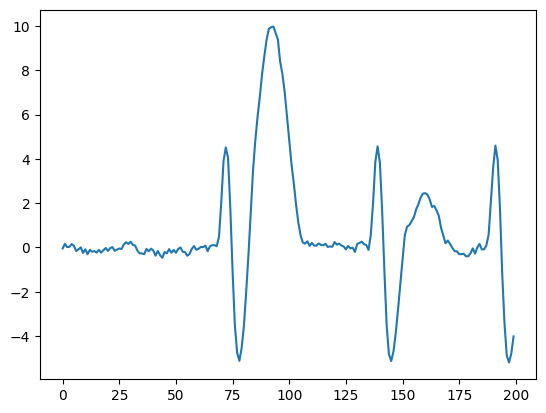

In [19]:
dat_py = list(data)
sns.lineplot(dat_py[:200])

## Specify formulas and basisfunctions

In [99]:
bf = jl.seval("basisfunction = firbasis(τ=(-0.4,.8), sfreq=100)")
bf

╭──────────────────────────────────────────────────────────────────────────────╮121×121 SparseArrays.SparseMatrixCSC with 121 stored entries:
│  ::BasisFunction                                                             │⎡⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤                                       
│  name:                                                                       │⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥                                       
│  kerneltype: FIRBasis                                                        │⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥                                       
│  width: 121                                                                  │⎢⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥                                       
│  height: 121                                                                 │⎢⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥                                       
│  colnames: [-0.4, -0.39 ... 0.8]                                             │⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⎥                                       
│  tim

In [107]:
formula = jl.seval("f = @formula 0 ~ 1 + condition + continuous")
bfDict = jl.seval("[ Any => (f, basisfunction)]")
bfDict

1-element Vector{Pair{DataType, Tuple{FormulaTerm{ConstantTerm{Int64}, Tuple{ConstantTerm{Int64}, Term, Term}}, FIRBasis}}}:
 Any => (0 ~ 1 + condition + continuous, ╭──────────────────────────────────────────────────────────────────────────────╮121×121 SparseArrays.SparseMatrixCSC with 121 stored entries:
│  ::BasisFunction                                                             │⎡⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤                                       
│  name:                                                                       │⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥                                       
│  kerneltype: FIRBasis                                                        │⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥                                       
│  width: 121                                                                  │⎢⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥                                       
│  height: 121                                                                 │⎢⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥                      

Model fitting

In [112]:
m = Unfold.fit(
    Unfold.UnfoldModel,
    bfDict,
    evts,
    data,
    # solver = jl.seval("(x, y) -> Unfold.solver_default(x, y; stderror = true)"),
    # eventcolumn = "condition",
)

In [113]:
results_jl = Unfold.coeftable(m)
results_jl

Row,channel,coefname,estimate,eventname,group,stderror,time
,Int64,String,Float64,Union…,Nothing,Nothing,Float64
1,1,(Intercept),-0.00948511,Any,,,-0.4
2,1,(Intercept),-0.0049313,Any,,,-0.39
3,1,(Intercept),-0.0115164,Any,,,-0.38
4,1,(Intercept),-0.00834639,Any,,,-0.37
5,1,(Intercept),-0.00628038,Any,,,-0.36
6,1,(Intercept),-0.00892178,Any,,,-0.35
7,1,(Intercept),-0.0137169,Any,,,-0.34
8,1,(Intercept),-0.00884687,Any,,,-0.33
9,1,(Intercept),-0.00766523,Any,,,-0.32


In [114]:
# Transfer results back to Python
results_py_df = pd.DataFrame({
    'channel': results_jl.channel,
    'coefname': results_jl.coefname,
    'estimate': results_jl.estimate,
    'eventname': results_jl.eventname,
    'group': results_jl.group,
    'stderror': results_jl.stderror,
    'time': results_jl.time
})

results_py_df.head()

,channel,coefname,estimate,eventname,group,stderror,time
0,1,(Intercept),-0.009485,Any,None,None,-0.40
1,1,(Intercept),-0.004931,Any,None,None,-0.39
2,1,(Intercept),-0.011516,Any,None,None,-0.38
3,1,(Intercept),-0.008346,Any,None,None,-0.37
4,1,(Intercept),-0.006280,Any,None,None,-0.36


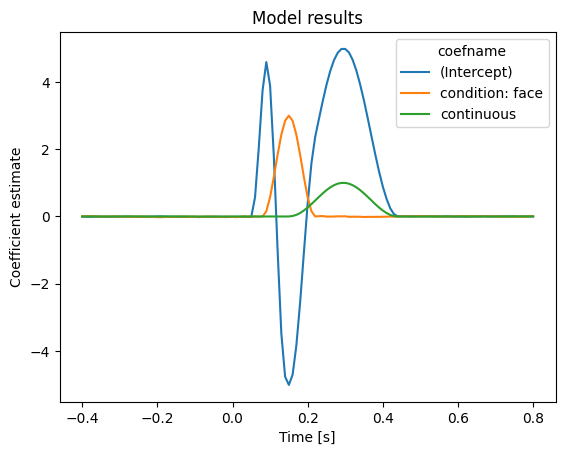

In [115]:
# Extract the coefficients for one channel
results_ch = results_py_df[results_py_df.channel == 1]

# Plot the coefficient estimates over time
ax = sns.lineplot(x = results_ch.time,y=results_ch.estimate,hue=results_ch.coefname)
ax.set(xlabel='Time [s]', ylabel='Coefficient estimate', title='Model results');

Plot exact clean waveforms of faces and houses

In [117]:
# Extract the coefficients for one channel
results_ch = results_py_df[results_py_df.channel == 1]

# Filter the DataFrame for 'i' and 'e' in the 'variable' column
filtered_df = results_ch[results_ch['coefname'].isin(['condition: face', '(Intercept)'])]
# Group by the 'time' column and sum the 'estimate' values
grouped_df = filtered_df.groupby('time', as_index=False)['estimate'].sum()

<Axes: xlabel='time', ylabel='estimate'>

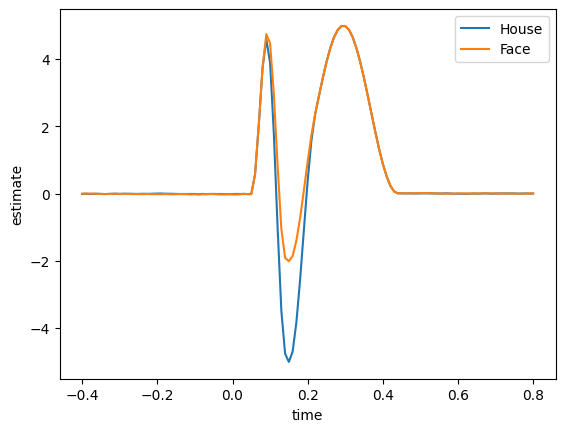

In [122]:
sns.lineplot(
    x = results_ch.time,
    y=results_ch[results_ch['coefname'] == '(Intercept)'].estimate, 
    label='House'
)
sns.lineplot(
    x = grouped_df.time,
    y=grouped_df.estimate,
    label='Face'
)